In [1]:
from pathlib import Path

import optuna
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context="notebook", style="whitegrid", rc=custom_params)

In [2]:
study_name = "decoder-5"  # Unique identifier of the study.
storage = optuna.storages.JournalStorage(
    optuna.storages.JournalFileStorage("../reports/optuna.log"),  # NFS path for distributed optimization
)
study = optuna.load_study(study_name=study_name, storage=storage)

/tmp/ipykernel_33189/378132697.py:2: ExperimentalWarning: JournalStorage is experimental (supported from v3.1.0). The interface can change in the future.
  storage = optuna.storages.JournalStorage(


In [3]:
df = study.trials_dataframe().query("state=='COMPLETE'").sort_values(by="datetime_start").reset_index(drop=True)
df

,number,value,datetime_start,datetime_complete,duration,params_d2_is,params_d_is,params_lr,params_ridge,params_sr,state
0,1,0.213667,2024-04-08 10:53:30.144045,2024-04-08 10:54:48.252401,0 days 00:01:18.108356,0.052240,31.820027,0.088009,1.224314e-08,3.628299,COMPLETE
1,5,0.833667,2024-04-08 10:53:30.147342,2024-04-08 10:54:50.606842,0 days 00:01:20.459500,8.970743,0.120015,0.299288,3.045249e-06,0.007294,COMPLETE
2,0,0.098889,2024-04-08 10:53:30.189962,2024-04-08 10:54:44.873543,0 days 00:01:14.683581,0.562841,0.100177,0.175982,1.703168e-08,3.893205,COMPLETE
3,2,0.824000,2024-04-08 10:53:30.211096,2024-04-08 10:54:53.424004,0 days 00:01:23.212908,1.054150,2.692174,0.297371,1.384082e-07,0.970322,COMPLETE
4,3,0.786889,2024-04-08 10:53:30.242583,2024-04-08 10:54:44.991436,0 days 00:01:14.748853,0.112537,0.807875,0.158603,6.522931e-08,0.097797,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...
845,849,0.856778,2024-04-08 12:12:11.380101,2024-04-08 12:13:54.371205,0 days 00:01:42.991104,13.232408,26.721348,0.340414,1.466662e-06,0.020631,COMPLETE
846,850,0.788667,2024-04-08 12:13:54.389875,2024-04-08 12:15:38.125487,0 days 00:01:43.735612,0.234772,1.312215,0.015758,7.430427e-05,0.001611,COMPLETE
847,851,0.726000,2024-04-08 12:15:38.140656,2024-04-08 12:17:22.189284,0 days 00:01:44.048628,0.105789,0.027414,0.012206,3.360136e-08,1.166341,COMPLETE
848,852,0.855889,2024-04-08 12:17:22.203455,2024-04-08 12:19:07.050637,0 days 00:01:44.847182,6.879785,19.218971,0.495869,1.290967e-08,0.004036,COMPLETE


In [4]:
df["rank"] = df["value"].argsort().argsort()

In [5]:
dfs = df.sort_values(by="rank", ascending=False)
top = dfs.head(50).filter(regex="params_*")
top.describe()

,params_d2_is,params_d_is,params_lr,params_ridge,params_sr
count,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,12.316549,35.782741,0.058617,3.094264e-05,0.068394
std,21.369070,27.769316,0.088877,7.859772e-05,0.116565
min,0.019428,3.433297,0.006770,1.488178e-08,0.001019
25%,0.191105,15.077044,0.020013,1.980423e-07,0.005123
50%,1.216979,26.246049,0.045791,9.939067e-07,0.019462
75%,14.699765,52.184797,0.065138,1.253157e-05,0.068347
max,76.380182,96.816398,0.631107,3.470801e-04,0.493127


In [6]:
df["error"] = 1 - df["value"]

In [7]:
study.best_params

{'sr': 0.0025457332737849657,
 'lr': 0.02244071523890502,
 'd_is': 33.86137801554551,
 'd2_is': 1.3781894535655945,
 'ridge': 1.0451573437599562e-06}

[None]

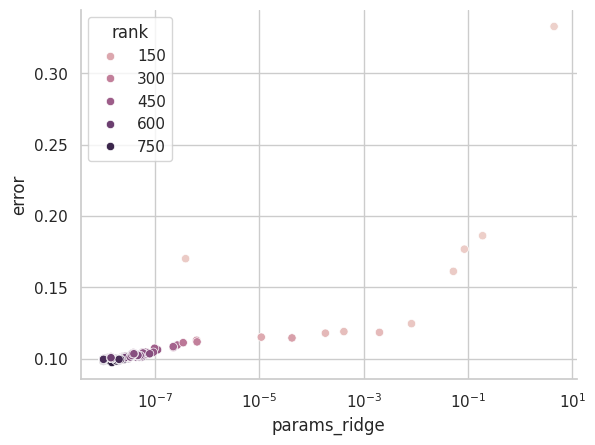

In [27]:
g = sns.scatterplot(df.query("params_seed==14"), x="params_ridge", y="error", hue="rank")
g.set(xscale="log")

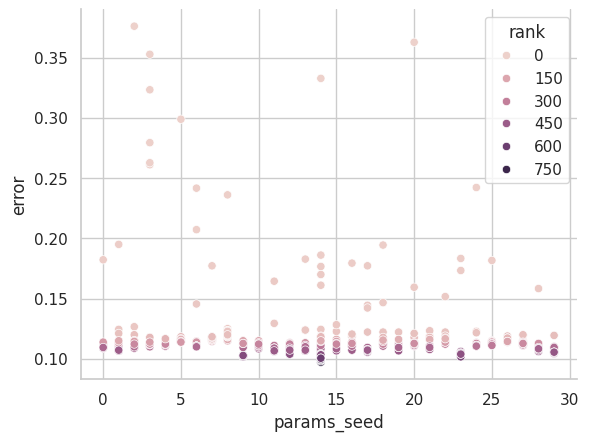

In [28]:
g = sns.scatterplot(df, x="params_seed", y="error", hue="rank")

[None, None]

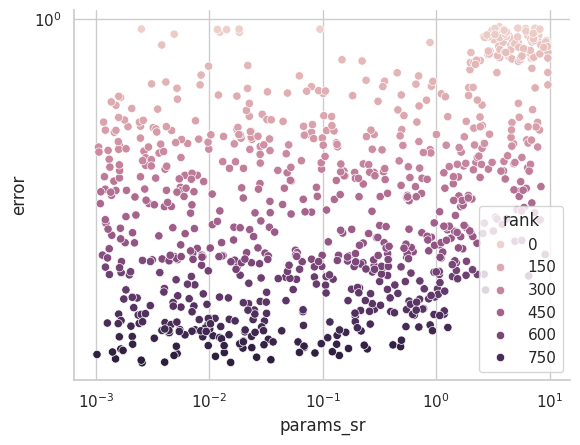

In [11]:
g = sns.scatterplot(df, x="params_sr", y="error", hue="rank")
g.set(xscale="log", yscale="log")

[None, None]

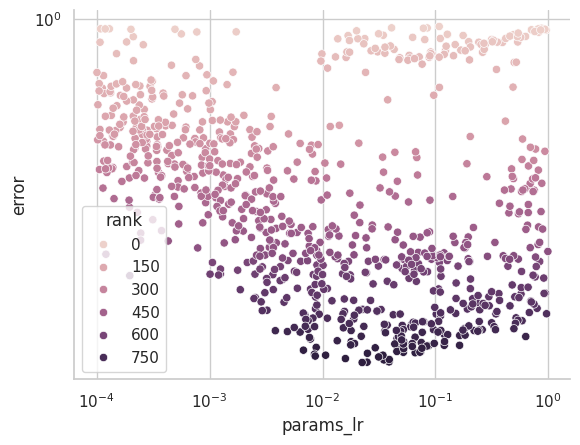

In [12]:
g = sns.scatterplot(df, x="params_lr", y="error", hue="rank")
g.set(xscale="log", yscale="log")

[None]

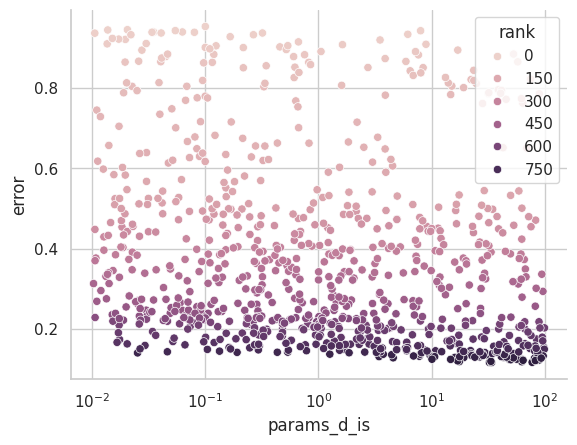

In [8]:
g = sns.scatterplot(df, x="params_d_is", y="error", hue="rank")
g.set(xscale="log")

[None]

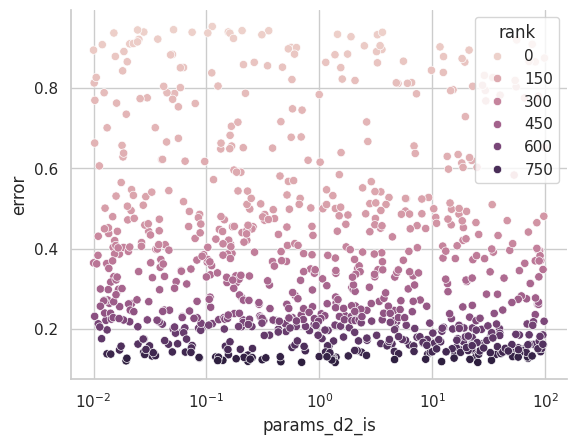

In [9]:
g = sns.scatterplot(df, x="params_d2_is", y="error", hue="rank")
g.set(xscale="log")

[None]

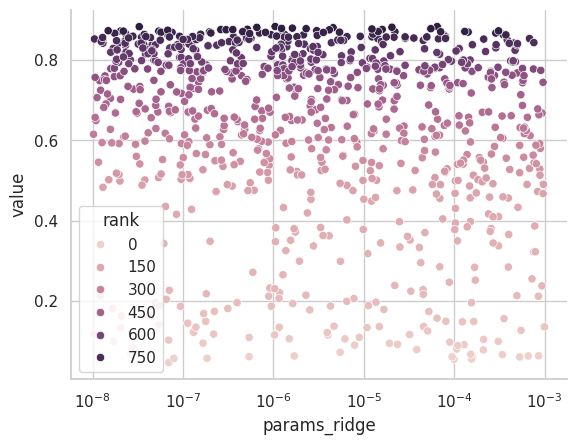

In [15]:
g = sns.scatterplot(df, x="params_ridge", y="value", hue="rank")
g.set(xscale="log")

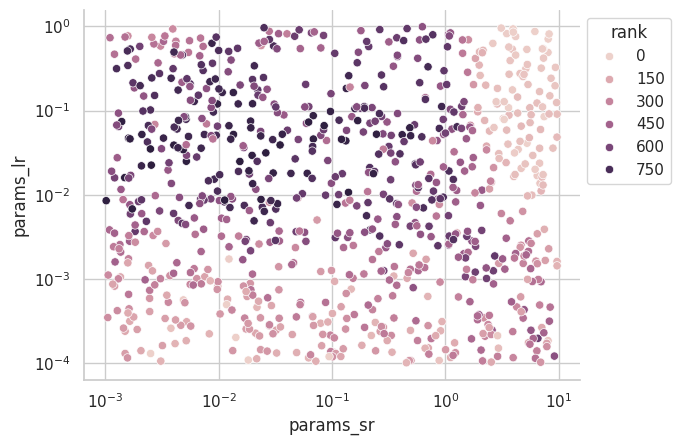

In [16]:
g = sns.scatterplot(df, x="params_sr", y="params_lr", hue="rank")
g.set(xscale="log", yscale="log")
sns.move_legend(g, loc="upper left", bbox_to_anchor=(1, 1))

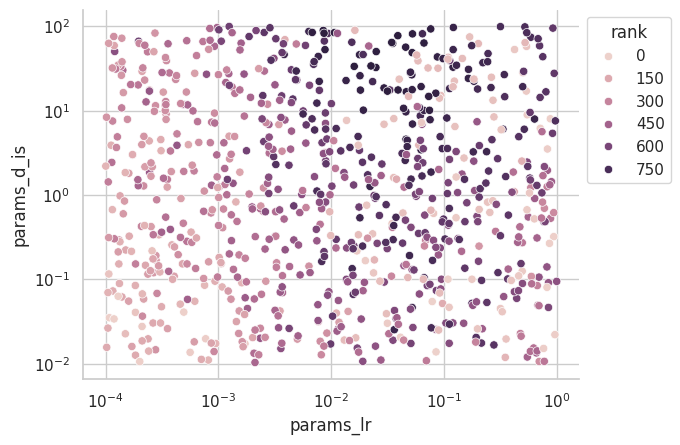

In [20]:
g = sns.scatterplot(df, x="params_lr", y="params_d_is", hue="rank")
g.set(xscale="log", yscale="log")
sns.move_legend(g, loc="upper left", bbox_to_anchor=(1, 1))

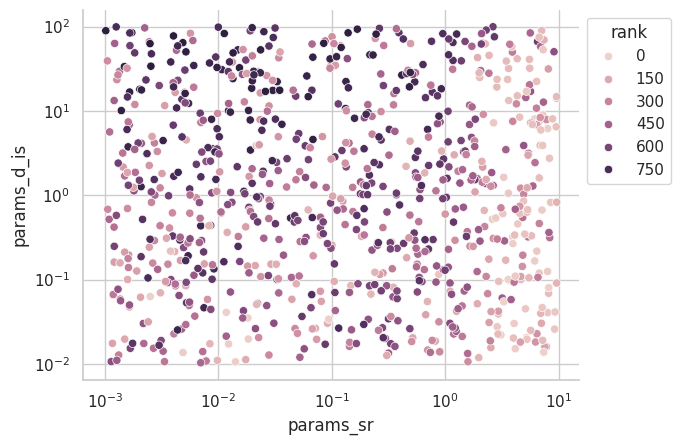

In [17]:
g = sns.scatterplot(df, x="params_sr", y="params_d_is", hue="rank")
g.set(xscale="log", yscale="log")
sns.move_legend(g, loc="upper left", bbox_to_anchor=(1, 1))

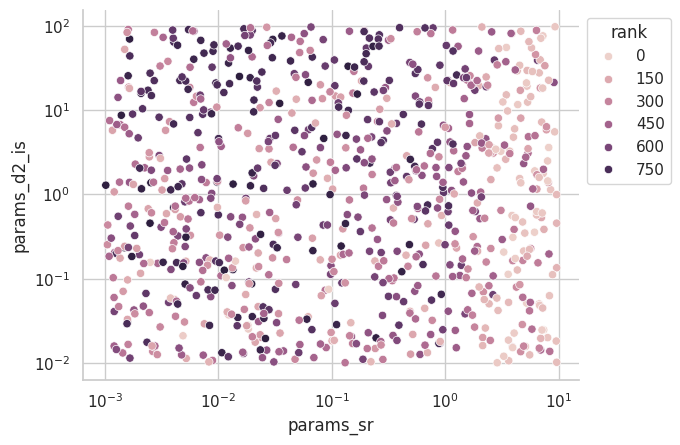

In [18]:
g = sns.scatterplot(df, x="params_sr", y="params_d2_is", hue="rank")
g.set(xscale="log", yscale="log")
# g.set(xscale="log")
sns.move_legend(g, loc="upper left", bbox_to_anchor=(1, 1))

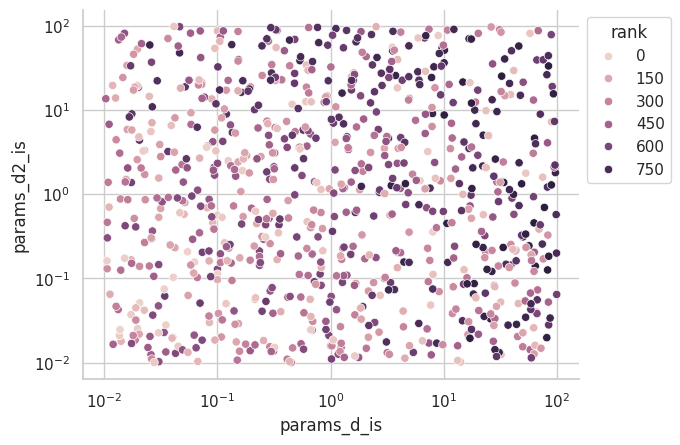

In [19]:
g = sns.scatterplot(df, x="params_d_is", y="params_d2_is", hue="rank")
g.set(xscale="log", yscale="log")
# g.set(xscale="log")
sns.move_legend(g, loc="upper left", bbox_to_anchor=(1, 1))